# Combining/mixing two different types of model 
All models in Keras wether Sequential, fFunctional or Subclassed all can go hand in hand with each other/ can smoothly incorporate with each other

## Creating a Functional model which has a subclass model incorporated:

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

#subclass model
class Classifier(keras.Model):
    def __init__(self,num_classes):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(num_units, activation= activation)

    def call(self,inputs):
        return self.dense(inputs)

#functional model
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu') (inputs)
outputs = Classifier(num_classes=8) (features)
model = keras.Model(inputs=inputs, outputs=outputs) 

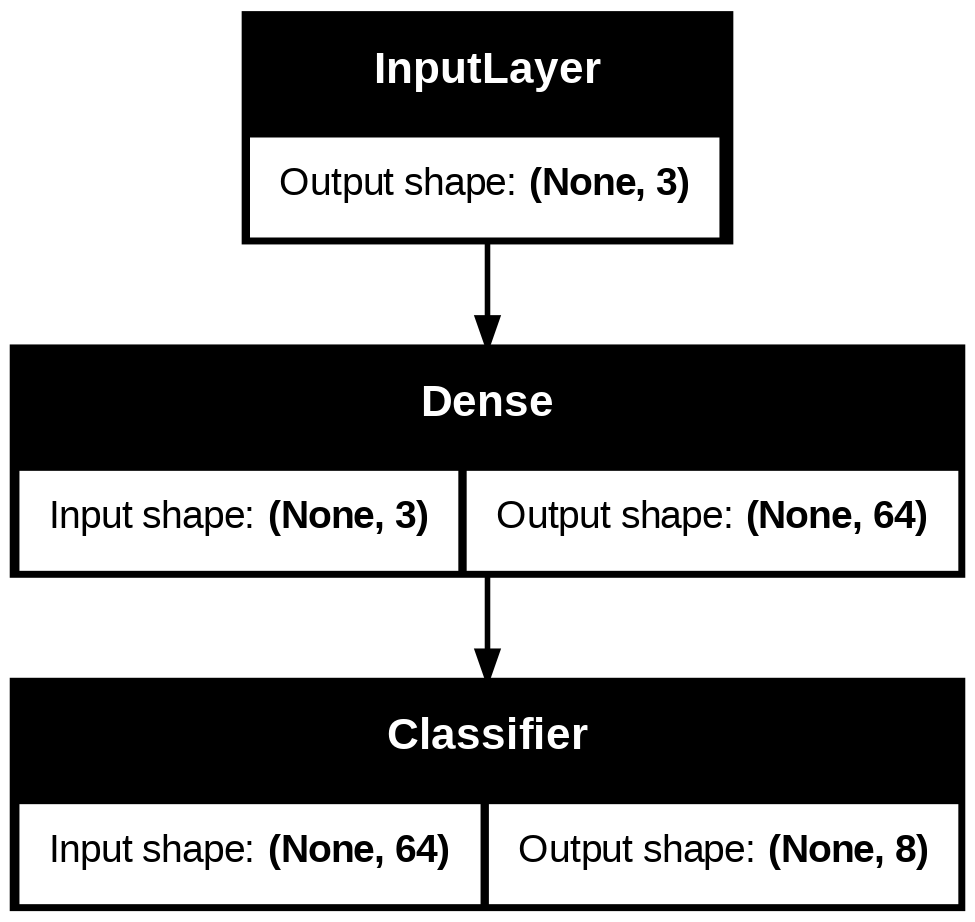

In [8]:
keras.utils.plot_model(model,'functional_model.png',show_shapes=True)

## Creating a Subclass model that has a Functional model incorporated:

In [10]:
#Functional model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid') (inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

#Subclass model
class sub_model(keras.Model):
    def __init__(self,num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier

    def call(self,inputs):
        features = self.dense(inputs)
        return self.classifer(features)

model = sub_model()